<a href="https://colab.research.google.com/github/radhika1112/Real-time-COVID-19-analysis/blob/master/COVID_19_Analysis_on_real_time_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## USING COVID-19 REAL TIME DATA FROM THE CORONA VIRUS TRACKER API 
https://coronavirus-tracker-api.herokuapp.com/all 

Date: 14 March 2020 5:16pm IST

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [0]:
api_url='https://coronavirus-tracker-api.herokuapp.com/all'

In [0]:
json_data=pd.read_json(api_url)

In [140]:
json_data.keys()

Index(['confirmed', 'deaths', 'latest', 'recovered'], dtype='object')

In [0]:
confirmed_data=json_data['confirmed']

In [142]:
deaths_data=json_data['deaths']
deaths_data

last_updated                          2020-03-15T09:57:15.285339Z
latest                                                       5819
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: deaths, dtype: object

In [143]:
latest_data=json_data['latest']
latest_data

last_updated         NaN
latest               NaN
locations            NaN
source               NaN
confirmed       156102.0
deaths            5819.0
recovered        72624.0
Name: latest, dtype: float64

In [144]:
recovered_data=json_data['recovered']
recovered_data

last_updated                          2020-03-15T09:57:18.768284Z
latest                                                      72624
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: recovered, dtype: object

In [0]:
deaths_locs=deaths_data['locations']

In [0]:
confirmed_locs=confirmed_data['locations']

In [0]:
recovered_locs=recovered_data['locations']

In [0]:
from pandas.io.json import json_normalize

confirmed_df = pd.DataFrame.from_dict(json_normalize(confirmed_locs), orient='columns')
deaths_df=pd.DataFrame.from_dict(json_normalize(deaths_locs), orient='columns')
recovered_df=pd.DataFrame.from_dict(json_normalize(recovered_locs), orient='columns')

In [0]:
recovered_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
deaths_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
confirmed_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)

In [150]:
deaths_df

,country,latest,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/14/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
0,Thailand,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Japan,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,2,4,4,5,0,0,0,0,0,0,0,6,10,15,16,19,22,6,6,6,6,6,6,6,10
2,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Saint Lucia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
438,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,Suriname,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
recovered_df.columns = recovered_df.columns.str.lstrip('history.')
deaths_df.columns = recovered_df.columns.str.lstrip('history.')
confirmed_df.columns = recovered_df.columns.str.lstrip('history.')

In [0]:


recovered_df = (recovered_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Recovered_count')
         .rename(columns={'level_2':'R_Date'}))


deaths_df = (deaths_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='death_count')
         .rename(columns={'level_2':'D_Date'}))


confirmed_df = (confirmed_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Confirmed_count')
         .rename(columns={'level_2':'C_Date'}))

In [153]:
confirmed_df

,country,latest,C_Date,Confirmed_count
0,Thailand,82,1/22/20,2
1,Thailand,82,1/23/20,3
2,Thailand,82,1/24/20,5
3,Thailand,82,1/25/20,7
4,Thailand,82,1/26/20,8
...,...,...,...,...
23421,occupied Palestinian territory,0,3/5/20,0
23422,occupied Palestinian territory,0,3/6/20,0
23423,occupied Palestinian territory,0,3/7/20,0
23424,occupied Palestinian territory,0,3/8/20,0


In [0]:
result = pd.concat([recovered_df, deaths_df,confirmed_df], axis=1, sort=False)

In [155]:
result

,country,latest,R_Date,Recovered_count,country,latest,D_Date,death_count,country,latest,C_Date,Confirmed_count
0,Thailand,35,1/22/20,0,Thailand,1,1/22/20,0,Thailand,82,1/22/20,2
1,Thailand,35,1/23/20,0,Thailand,1,1/23/20,0,Thailand,82,1/23/20,3
2,Thailand,35,1/24/20,0,Thailand,1,1/24/20,0,Thailand,82,1/24/20,5
3,Thailand,35,1/25/20,0,Thailand,1,1/25/20,0,Thailand,82,1/25/20,7
4,Thailand,35,1/26/20,2,Thailand,1,1/26/20,0,Thailand,82,1/26/20,8
...,...,...,...,...,...,...,...,...,...,...,...,...
23421,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0
23422,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0
23423,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0
23424,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0


In [0]:
result=result[['country','R_Date','Recovered_count','death_count','Confirmed_count']]

In [157]:
result=result.iloc[:,2:]
result

,country,R_Date,Recovered_count,death_count,Confirmed_count
0,Thailand,1/22/20,0,0,2
1,Thailand,1/23/20,0,0,3
2,Thailand,1/24/20,0,0,5
3,Thailand,1/25/20,0,0,7
4,Thailand,1/26/20,2,0,8
...,...,...,...,...,...
23421,occupied Palestinian territory,3/5/20,0,0,0
23422,occupied Palestinian territory,3/6/20,0,0,0
23423,occupied Palestinian territory,3/7/20,0,0,0
23424,occupied Palestinian territory,3/8/20,0,0,0


In [158]:
result.country.unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [0]:
count_in_India = result[result['country']=='India']

In [164]:
maxd=max(count_in_India['R_Date'])
maxd

AttributeError: ignored

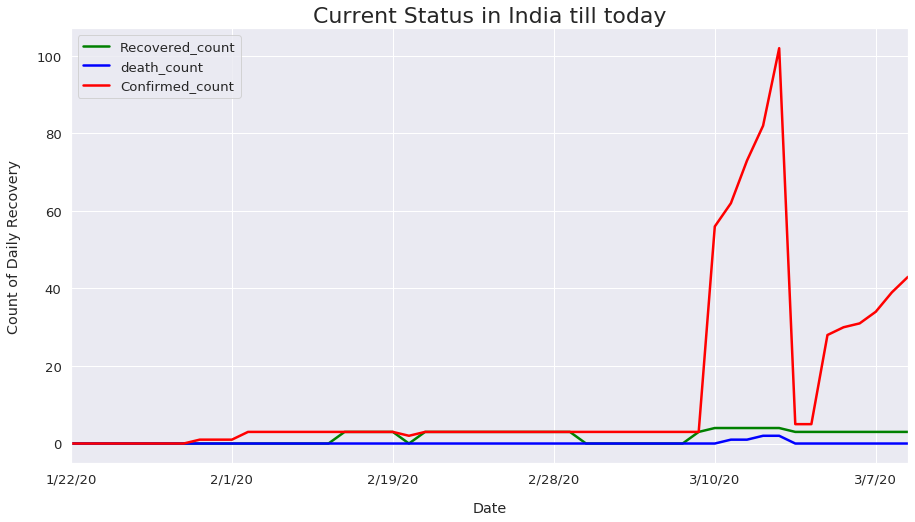

In [163]:
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
count_in_India.set_index('R_Date')['Recovered_count'].plot(figsize=(15, 8), linewidth=2.5, color='green')
count_in_India.set_index('R_Date')['death_count'].plot(figsize=(15, 8), linewidth=2.5, color='blue')
count_in_India.set_index('R_Date')['Confirmed_count'].plot(figsize=(15, 8), linewidth=2.5, color='red')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Count of Daily Recovery", labelpad=15)
plt.legend()
plt.title("Current Status in India till today", y=1.0, fontsize=22);